In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = "/content/drive/MyDrive/dataset-update/products_master.csv"
df = pd.read_csv(file_path)
print("Loaded:", file_path)
df.head()

Loaded: /content/drive/MyDrive/dataset-update/products_master.csv


,product_id,product_name,merchant,item_type,category,price_min,price_max
0,1,MamyPoko Pants X-Tra Kering S-40,Modern Retail,Needs,Baby Care,52000,60000
1,2,MamyPoko Pants X-Tra Kering M-34,Modern Retail,Needs,Baby Care,52000,60000
2,3,MamyPoko Pants X-Tra Kering L-30,Modern Retail,Needs,Baby Care,52000,60000
3,4,MamyPoko Pants X-Tra Kering XL-26,Modern Retail,Needs,Baby Care,52000,60000
4,5,MamyPoko Pants X-Tra Kering XXL-24,Modern Retail,Needs,Baby Care,52000,60000


In [4]:
df.head()

,product_id,product_name,merchant,item_type,category,price_min,price_max
0,1,MamyPoko Pants X-Tra Kering S-40,Modern Retail,Needs,Baby Care,52000,60000
1,2,MamyPoko Pants X-Tra Kering M-34,Modern Retail,Needs,Baby Care,52000,60000
2,3,MamyPoko Pants X-Tra Kering L-30,Modern Retail,Needs,Baby Care,52000,60000
3,4,MamyPoko Pants X-Tra Kering XL-26,Modern Retail,Needs,Baby Care,52000,60000
4,5,MamyPoko Pants X-Tra Kering XXL-24,Modern Retail,Needs,Baby Care,52000,60000


In [5]:
print("Jumlah baris, kolom:", df.shape)
print("Kolom:", df.columns.tolist())

Jumlah baris, kolom: (1443, 7)
Kolom: ['product_id', 'product_name', 'merchant', 'item_type', 'category', 'price_min', 'price_max']


In [6]:
print("\nTipe data tiap kolom:")
print(df.dtypes)


Tipe data tiap kolom:
product_id       int64
product_name    object
merchant        object
item_type       object
category        object
price_min        int64
price_max        int64
dtype: object


In [7]:
print("\nMissing value tiap kolom:")
print(df.isna().sum())


Missing value tiap kolom:
product_id      0
product_name    0
merchant        0
item_type       0
category        0
price_min       0
price_max       0
dtype: int64


In [8]:
print("Duplikat baris (full row):", df.duplicated().sum())

if "product_id" in df.columns:
    print("Duplikat product_id:", df.duplicated(subset=["product_id"]).sum())

if "product_name" in df.columns:
    print("Duplikat product_name:", df.duplicated(subset=["product_name"]).sum())

Duplikat baris (full row): 0
Duplikat product_id: 0
Duplikat product_name: 4


**Note:**
terdapat duplikat di ```product_name```

In [9]:
df[df.duplicated(subset=["product_name"], keep=False)][
    ["product_id", "product_name", "category", "price_min", "price_max"]
].sort_values("product_name")

,product_id,product_name,category,price_min,price_max
1254,1255,Aerostreet Brooklyn Hitam,Fashion,180405,190000
1441,1442,Aerostreet Brooklyn Hitam,Fashion,180405,210000
1360,1361,Eiger Aquapura Waterproof Jacket,Fashion,1649000,1750000
1438,1439,Eiger Aquapura Waterproof Jacket,Fashion,1649000,1900000
1359,1360,Eiger Strenuous Windproof Jacket,Fashion,970000,1000000
1437,1438,Eiger Strenuous Windproof Jacket,Fashion,970000,1100000
232,233,Pond's Men Energy Charge Face Wash 100g,Beauty Care,30000,36000
1053,1054,Pond's Men Energy Charge Face Wash 100g,Personal Care,30000,36000


**Note:**

Dapat dilihat bahwa terdapat duplikasi pada ```product_name``` : Pond's Men Energy Charge Face Wash 100g. Namun kedua product tersebut berada di ```category``` yang berbeda yang nantinya akan membingungkan model. Maka kedua product akan disamakan menjadi Beauty Care.

In [10]:
mask = df["product_name"] == "Pond's Men Energy Charge Face Wash 100g"
df.loc[mask, "category"] = "Beauty Care"

In [11]:
df[mask][["product_name", "category", "price_min", "price_max"]]

,product_name,category,price_min,price_max
232,Pond's Men Energy Charge Face Wash 100g,Beauty Care,30000,36000
1053,Pond's Men Energy Charge Face Wash 100g,Beauty Care,30000,36000


In [12]:
print("Jumlah kategori unik:", df["category"].nunique())
print("\nDistribusi kategori (top 10):")
print(df["category"].value_counts().head(10))

Jumlah kategori unik: 11

Distribusi kategori (top 10):
category
Fashion                259
Groceries              237
Dining Out             191
Beauty Care            190
Personal Care          106
Entertainment          100
Billing & Utilities     89
Snacks                  79
Baby Care               69
Beverages               64
Name: count, dtype: int64


In [13]:
small = df["category"].value_counts()
print("\nKategori dengan jumlah data < 10:")
print(small[small < 10])


Kategori dengan jumlah data < 10:
Series([], Name: count, dtype: int64)


In [14]:
print(df[["price_min", "price_max"]].describe())

          price_min     price_max
count  1.443000e+03  1.443000e+03
mean   1.637189e+05  2.277954e+05
std    4.823118e+05  7.378896e+05
min    5.000000e+02  9.000000e+02
25%    1.500000e+04  1.900000e+04
50%    3.200000e+04  3.900000e+04
75%    7.975000e+04  1.000000e+05
max    5.302000e+06  1.000000e+07


In [15]:
print("Jumlah price_min > price_max:", (df["price_min"] > df["price_max"]).sum())
print("Jumlah price_min < 0:", (df["price_min"] < 0).sum())
print("Jumlah price_max < 0:", (df["price_max"] < 0).sum())

Jumlah price_min > price_max: 0
Jumlah price_min < 0: 0
Jumlah price_max < 0: 0


In [16]:
print("Jumlah product_name kosong:", df["product_name"].isna().sum())
print("Contoh 10 product_name:")
print(df["product_name"].head(10).tolist())

Jumlah product_name kosong: 0
Contoh 10 product_name:
['MamyPoko Pants X-Tra Kering S-40', 'MamyPoko Pants X-Tra Kering M-34', 'MamyPoko Pants X-Tra Kering L-30', 'MamyPoko Pants X-Tra Kering XL-26', 'MamyPoko Pants X-Tra Kering XXL-24', 'Sweety Silver Pants M-30', 'Sweety Silver Pants L-28', 'Merries Pants Good Skin M-34', 'Makuku Air Diapers Comfort Fit M-32', 'Baby Happy Body Fit Pants M-34']


In [17]:
name_len = df["product_name"].astype(str).str.len()
print(name_len.describe())

count    1443.000000
mean       31.331254
std         8.088521
min        12.000000
25%        25.000000
50%        31.000000
75%        36.500000
max        60.000000
Name: product_name, dtype: float64


## **DATA PREPARATION**

In [18]:
cols_needed = ["product_name", "category", "price_min", "price_max"]
df_model = df[cols_needed].copy()

In [19]:
print(df_model.shape)
df_model.head()

(1443, 4)


,product_name,category,price_min,price_max
0,MamyPoko Pants X-Tra Kering S-40,Baby Care,52000,60000
1,MamyPoko Pants X-Tra Kering M-34,Baby Care,52000,60000
2,MamyPoko Pants X-Tra Kering L-30,Baby Care,52000,60000
3,MamyPoko Pants X-Tra Kering XL-26,Baby Care,52000,60000
4,MamyPoko Pants X-Tra Kering XXL-24,Baby Care,52000,60000


In [20]:
conflict = (
    df_model.groupby("product_name")["category"]
    .nunique()
    .reset_index()
    .query("category > 1")
)

print("Jumlah product_name dengan kategori berbeda:", len(conflict))
conflict

Jumlah product_name dengan kategori berbeda: 0


,product_name,category


In [21]:
df_model["product_name_clean"] = (
    df_model["product_name"]
    .astype(str)
    .str.lower()
    .str.strip()
    .str.replace(r"\s+", " ", regex=True)
)

In [22]:
df_model[["product_name", "product_name_clean"]].head(10)

,product_name,product_name_clean
0,MamyPoko Pants X-Tra Kering S-40,mamypoko pants x-tra kering s-40
1,MamyPoko Pants X-Tra Kering M-34,mamypoko pants x-tra kering m-34
2,MamyPoko Pants X-Tra Kering L-30,mamypoko pants x-tra kering l-30
3,MamyPoko Pants X-Tra Kering XL-26,mamypoko pants x-tra kering xl-26
4,MamyPoko Pants X-Tra Kering XXL-24,mamypoko pants x-tra kering xxl-24
5,Sweety Silver Pants M-30,sweety silver pants m-30
6,Sweety Silver Pants L-28,sweety silver pants l-28
7,Merries Pants Good Skin M-34,merries pants good skin m-34
8,Makuku Air Diapers Comfort Fit M-32,makuku air diapers comfort fit m-32
9,Baby Happy Body Fit Pants M-34,baby happy body fit pants m-34


In [23]:
df_model["price_min"] = pd.to_numeric(df_model["price_min"], errors="coerce")
df_model["price_max"] = pd.to_numeric(df_model["price_max"], errors="coerce")

In [24]:
print("Missing price_min after numeric:", df_model["price_min"].isna().sum())
print("Missing price_max after numeric:", df_model["price_max"].isna().sum())

Missing price_min after numeric: 0
Missing price_max after numeric: 0


In [25]:
df_model["price_mid"] = (df_model["price_min"] + df_model["price_max"]) / 2

In [26]:
df_model["price_range"] = df_model["price_max"] - df_model["price_min"]

In [27]:
X = df_model[["product_name_clean", "price_mid"]].copy()
y = df_model["category"].copy()

print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()

X shape: (1443, 2)
y shape: (1443,)


,product_name_clean,price_mid
0,mamypoko pants x-tra kering s-40,56000.0
1,mamypoko pants x-tra kering m-34,56000.0
2,mamypoko pants x-tra kering l-30,56000.0
3,mamypoko pants x-tra kering xl-26,56000.0
4,mamypoko pants x-tra kering xxl-24,56000.0


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape, y_train.shape)
print("Test size :", X_test.shape, y_test.shape)

Train size: (1154, 2) (1154,)
Test size : (289, 2) (289,)


In [29]:
print("Distribusi label TRAIN (top 10):")
print(y_train.value_counts().head(10))

print("\nDistribusi label TEST (top 10):")
print(y_test.value_counts().head(10))

Distribusi label TRAIN (top 10):
category
Fashion                207
Groceries              190
Dining Out             153
Beauty Care            152
Personal Care           85
Entertainment           80
Billing & Utilities     71
Snacks                  63
Baby Care               55
Beverages               51
Name: count, dtype: int64

Distribusi label TEST (top 10):
category
Fashion                52
Groceries              47
Beauty Care            38
Dining Out             38
Personal Care          21
Entertainment          20
Billing & Utilities    18
Snacks                 16
Baby Care              14
Beverages              13
Name: count, dtype: int64


## **FEATURE ENGINEERING**

In [30]:
X_train.head()

,product_name_clean,price_mid
559,marugame udon niku udon regular,65000.0
186,viva liquid foundation natural,7000.0
336,pembayaran pdam tangerang,172500.0
856,saus tiram lee kum kee panda botol 255g,31500.0
18,promina baby crunchies keju cheddar 20g,14000.0


In [31]:
text_feature = "product_name_clean"
numeric_features = ["price_mid"]

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    lowercase=False,
    ngram_range=(1, 2),
    max_features=3000,
    min_df=2
)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [34]:
from sklearn.compose import ColumnTransformer

text_feature = "product_name_clean"
numeric_features = ["price_mid"]

preprocessor = ColumnTransformer(
    transformers=[
        ("text", tfidf, text_feature),
        ("num", StandardScaler(), numeric_features)
    ]
)

In [35]:
# (Opsional) Cek bentuk fitur setelah preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
print("Shape fitur setelah preprocessing:", X_train_transformed.shape)

Shape fitur setelah preprocessing: (1154, 1537)


In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"  # perlu diaktifkan kalau nanti F1 macro jelek karena imbalance
)

In [37]:
from sklearn.pipeline import Pipeline

clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", model)
])

clf.fit(X_train, y_train)

print("Training selesai")

Training selesai


In [38]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8685121107266436

Classification Report:
                     precision    recall  f1-score   support

          Baby Care       0.81      0.93      0.87        14
        Beauty Care       0.95      0.95      0.95        38
          Beverages       0.75      0.92      0.83        13
Billing & Utilities       1.00      0.89      0.94        18
         Dining Out       0.81      0.92      0.86        38
      Entertainment       0.89      0.80      0.84        20
            Fashion       0.96      0.96      0.96        52
        Frozen Food       0.86      1.00      0.92        12
          Groceries       0.85      0.87      0.86        47
      Personal Care       0.76      0.62      0.68        21
             Snacks       0.64      0.44      0.52        16

           accuracy                           0.87       289
          macro avg       0.84      0.85      0.84       289
       weighted avg       0.87      0.87      0.86       289



<Figure size 1000x800 with 0 Axes>

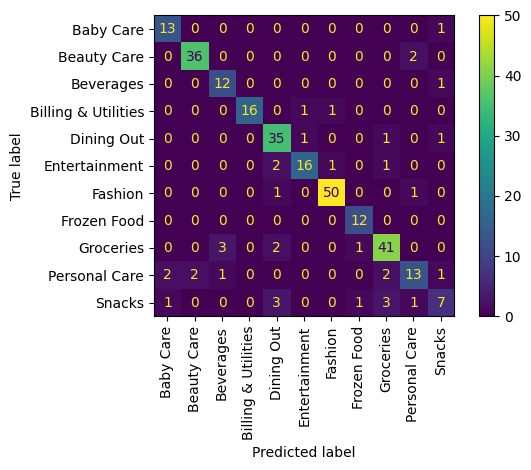

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, xticks_rotation=90)
plt.tight_layout()
plt.show()

In [40]:
error_df = X_test.copy()
error_df["true_label"] = y_test.values
error_df["pred_label"] = y_pred

errors = error_df[error_df["true_label"] != error_df["pred_label"]]
print("Jumlah salah prediksi:", len(errors))
errors.head(40)

Jumlah salah prediksi: 38


,product_name_clean,price_mid,true_label,pred_label
1052,garnier men turbolight oil control 100ml,35000.0,Personal Care,Beauty Care
1143,good time chocochip cookies 72g,8500.0,Snacks,Frozen Food
1086,sweety silver pants l 28,63000.0,Personal Care,Baby Care
232,pond's men energy charge face wash 100g,33000.0,Beauty Care,Personal Care
700,sewa sepeda listrik (beam/gowes),22500.0,Entertainment,Dining Out
967,teh celup sosro 30 bags,6750.0,Groceries,Beverages
1051,garnier men acno fight foam 100ml,35000.0,Personal Care,Beauty Care
1158,yupi strawberry kiss 120g,12500.0,Snacks,Baby Care
1048,betadine obat kumur 190ml,38500.0,Personal Care,Beverages
66,heinz biscotti chocolate 60g,30000.0,Baby Care,Snacks


In [41]:
SNACK_KW = [
    "snack","biskuit","biscuit","cracker","crackers",
    "permen","candy","chocolate","coklat","wafer",
    "kitkat","beng beng","nano nano","nissin","nextar","twistko","yupi"
]

def has_snack_kw(text):
    t = (text or "").lower()
    return int(any(k in t for k in SNACK_KW))

df_model["has_snack_kw"] = df_model["product_name_clean"].apply(has_snack_kw)

In [42]:
def medical_rule(product_name, pred_label, confidence):
    t = (product_name or "").lower()
    if confidence < 0.8 and any(k in t for k in [
        "betadine","obat kumur","mouthwash",
        "hand sanitizer","antisept","dettol","antis"
    ]):
        return "Personal Care"
    return pred_label

In [43]:
y_pred = clf.predict(X_test)
proba = clf.predict_proba(X_test)
conf = proba.max(axis=1)

In [44]:
y_pred_final = np.array([
    medical_rule(
        product_name=X_test.iloc[i]["product_name_clean"],
        pred_label=y_pred[i],
        confidence=float(conf[i])
    )
    for i in range(len(X_test))
])

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

Accuracy: 0.8788927335640139
                     precision    recall  f1-score   support

          Baby Care       0.81      0.93      0.87        14
        Beauty Care       0.95      0.95      0.95        38
          Beverages       0.80      0.92      0.86        13
Billing & Utilities       1.00      0.89      0.94        18
         Dining Out       0.81      0.92      0.86        38
      Entertainment       0.89      0.80      0.84        20
            Fashion       0.96      0.96      0.96        52
        Frozen Food       0.86      1.00      0.92        12
          Groceries       0.87      0.87      0.87        47
      Personal Care       0.80      0.76      0.78        21
             Snacks       0.70      0.44      0.54        16

           accuracy                           0.88       289
          macro avg       0.86      0.86      0.85       289
       weighted avg       0.88      0.88      0.88       289



In [46]:
check = X_test.copy()
check["true"] = y_test.values
check["pred"] = y_pred
check["pred_final"] = y_pred_final
check["conf"] = conf

targets = [
    "nissin crispy crackers",
    "nano nano kulit jeruk",
    "good time chocochip cookies",
    "betadine obat kumur",
    "kitkat",
    "beng beng",
    "yupi"
]

mask = check["product_name_clean"].str.contains("|".join(targets), case=False, na=False)
check[mask][["product_name_clean","price_mid","true","pred","pred_final","conf"]].sort_values("product_name_clean")

,product_name_clean,price_mid,true,pred,pred_final,conf
1138,beng beng share it pouch 95g,14500.0,Snacks,Groceries,Groceries,0.452086
1048,betadine obat kumur 190ml,38500.0,Personal Care,Beverages,Personal Care,0.238209
1143,good time chocochip cookies 72g,8500.0,Snacks,Frozen Food,Frozen Food,0.168428
1155,kitkat 4 fingers 35g,10000.0,Snacks,Groceries,Groceries,0.173796
1163,nano nano kulit jeruk 10g,4000.0,Snacks,Groceries,Groceries,0.184084
1183,nissin crispy crackers 225g,15500.0,Snacks,Personal Care,Personal Care,0.147015
1157,yupi gummy burger 100g,12500.0,Snacks,Dining Out,Dining Out,0.171555
1158,yupi strawberry kiss 120g,12500.0,Snacks,Baby Care,Baby Care,0.376085


In [47]:
err = X_test.copy()
err["true"] = y_test.values
err["pred_final"] = y_pred_final

errors = err[err["true"] != err["pred_final"]]
print("Jumlah salah prediksi (final):", len(errors))
errors.head(40)

Jumlah salah prediksi (final): 35


,product_name_clean,price_mid,true,pred_final
1052,garnier men turbolight oil control 100ml,35000.0,Personal Care,Beauty Care
1143,good time chocochip cookies 72g,8500.0,Snacks,Frozen Food
1086,sweety silver pants l 28,63000.0,Personal Care,Baby Care
232,pond's men energy charge face wash 100g,33000.0,Beauty Care,Personal Care
700,sewa sepeda listrik (beam/gowes),22500.0,Entertainment,Dining Out
967,teh celup sosro 30 bags,6750.0,Groceries,Beverages
1051,garnier men acno fight foam 100ml,35000.0,Personal Care,Beauty Care
1158,yupi strawberry kiss 120g,12500.0,Snacks,Baby Care
66,heinz biscotti chocolate 60g,30000.0,Baby Care,Snacks
799,timun kyuri jepang hydroponic 500g,11000.0,Groceries,Frozen Food


In [48]:
import json

JSONL_PATH = "/content/drive/MyDrive/receipt_raw.jsonl"

data = []
with open(JSONL_PATH, "r", encoding="utf-8") as f:
    for line in f:
        if line.strip():
            data.append(json.loads(line))

len(data)

100000

In [49]:
if isinstance(data, dict):
    data = [data]

In [50]:
def flatten_transactions(transactions):
    rows = []
    for i, tx in enumerate(transactions):
        tx_id = tx.get("transaction_id") or tx.get("id") or f"TX_{i:06d}"
        merchant = tx.get("nama_toko") or tx.get("merchant") or "UNKNOWN"
        date = tx.get("tanggal") or tx.get("date")

        items = tx.get("daftar_item") or tx.get("items") or tx.get("line_items") or []
        for it in items:
            item_name = it.get("nama_barang") or it.get("item_name") or it.get("name")
            amount = it.get("harga") or it.get("amount") or it.get("price")
            qty = it.get("jumlah") or it.get("qty") or 1

            if item_name is None or amount is None:
                continue

            rows.append({
                "transaction_id": tx_id,
                "merchant": merchant,
                "date": date,
                "item_name": str(item_name),
                "amount": float(amount),
                "qty": int(qty) if str(qty).isdigit() else 1
            })
    return pd.DataFrame(rows)

df_items = flatten_transactions(data)
df_items.head(20)

""


In [51]:
import joblib
import os

save_path = "/content/drive/MyDrive/Models"
os.makedirs(save_path, exist_ok=True)

model_file = os.path.join(save_path, "product_category_pipeline_final.pkl")
joblib.dump(clf, model_file)

print("Model tersimpan di:", model_file)

Model tersimpan di: /content/drive/MyDrive/Models/product_category_pipeline_final.pkl


## Uji Model Klasifikasi dari Output OCR (JSON)


In [52]:
import json, pandas as pd

JSONL_PATH = "/content/drive/MyDrive/receipt_raw.jsonl"

rows = []
with open(JSONL_PATH, "r", encoding="utf-8") as f:
    for line in f:
        if line.strip():
            rows.append(json.loads(line))

df_tx = pd.DataFrame(rows)
df_tx.head()

,transaction_id,merchant,receipt_text_raw,confidence,error_flag,ocr_noise_type
0,TX90000001,TikTok Shop,TIKTOK SHOP ORDER #404124\nHologram Sticker Pa...,0.61,False,None
1,TX90000002,Shopee,SHOPEE ORDER #868293\nCleansing Blm Largeam La...,0.83,False,None
2,TX90000003,Shopee,SHOPEE ORDER #520823\nCardigan ...,0.87,False,None
3,TX90000004,Shopee,SHOPEE ORDER #302694\nCute Desk Lamp V2 ...,0.85,False,None
4,TX90000005,TikTok Shop,TIKTOK SHOP ORDER #881720\nJersey Large ...,0.86,False,None


In [53]:
import re

PAT_INLINE = re.compile(r"^(?P<name>.+?)\s+Rp\s*(?P<price>\d{1,3}(?:[.,]\d{3})*|\d+)", re.IGNORECASE)

def extract_items_from_receipt_text(text_raw: str):
    items = []
    if not text_raw:
        return items

    lines = [ln.strip() for ln in text_raw.splitlines() if ln.strip()]
    for ln in lines:
        low = ln.lower()

        # skip non-item lines
        if any(k in low for k in ["total", "payment", "order", "tiktok shop", "shopee"]):
            continue

        m = PAT_INLINE.match(ln)
        if not m:
            continue

        name = m.group("name").strip()
        price_str = m.group("price")
        price = int(re.sub(r"[^\d]", "", price_str))  # remove . , etc

        # validasi minimal
        if len(name) < 3:
            continue

        items.append({"item_name": name, "amount": price, "qty": 1})
    return items

In [54]:
def build_items_df(df_tx: pd.DataFrame):
    rows = []
    for _, r in df_tx.iterrows():
        tx_id = r.get("transaction_id")
        merchant = r.get("merchant")
        conf_ocr = r.get("confidence")
        items = extract_items_from_receipt_text(r.get("receipt_text_raw", ""))

        for it in items:
            rows.append({
                "transaction_id": tx_id,
                "merchant": merchant,
                "ocr_confidence": conf_ocr,
                "item_name": it["item_name"],
                "amount": it["amount"],
                "qty": it.get("qty", 1)
            })
    return pd.DataFrame(rows)

df_items = build_items_df(df_tx)
print("Jumlah item terdeteksi:", len(df_items))
df_items.head(20)

Jumlah item terdeteksi: 233431


,transaction_id,merchant,ocr_confidence,item_name,amount,qty
0,TX90000001,TikTok Shop,0.61,Hologram Sticker Pack Pro x1,136942,1
1,TX90000001,TikTok Shop,0.61,Hijab Premium,73514,1
2,TX90000002,Shopee,0.83,Cleansing Blm Largeam Large,198000,1
3,TX90000002,Shopee,0.83,Sheet Mas SmallkSmall,101000,1
4,TX90000002,Shopee,0.83,LED Desk Lamp Pro,46000,1
5,TX90000003,Shopee,0.87,Cardigan,102051,1
6,TX90000004,Shopee,0.85,Cute Desk Lamp V2,184161,1
7,TX90000004,Shopee,0.85,LED Desk Lmp Setap Set,90291,1
8,TX90000004,Shopee,0.85,Body Lotion Limited,52809,1
9,TX90000005,TikTok Shop,0.86,Jersey Large,115234,1


In [55]:
import joblib, numpy as np

MODEL_PATH = "/content/drive/MyDrive/Capstone Project/Models/product_category_pipeline_final.pkl"
clf = joblib.load(MODEL_PATH)

# fitur input
X = pd.DataFrame({
    "product_name_clean": df_items["item_name"].astype(str).str.lower().str.strip(),
    "price_mid": df_items["amount"].astype(float),
})

SNACK_KW = [
    "snack","biskuit","biscuit","cracker","crackers",
    "permen","candy","chocolate","coklat","wafer",
    "kitkat","beng beng","nano nano","nissin","nextar","twistko","yupi"
]
def has_snack_kw(text):
    t = (text or "").lower()
    return int(any(k in t for k in SNACK_KW))

X["has_snack_kw"] = X["product_name_clean"].apply(has_snack_kw)

pred = clf.predict(X)
conf = clf.predict_proba(X).max(axis=1)

df_result = df_items.copy()
df_result["predicted_category"] = pred
df_result["confidence"] = np.round(conf, 3)

df_result.head(30)

,transaction_id,merchant,ocr_confidence,item_name,amount,qty,predicted_category,confidence
0,TX90000001,TikTok Shop,0.61,Hologram Sticker Pack Pro x1,136942,1,Beverages,0.154
1,TX90000001,TikTok Shop,0.61,Hijab Premium,73514,1,Entertainment,0.401
2,TX90000002,Shopee,0.83,Cleansing Blm Largeam Large,198000,1,Entertainment,0.231
3,TX90000002,Shopee,0.83,Sheet Mas SmallkSmall,101000,1,Beauty Care,0.119
4,TX90000002,Shopee,0.83,LED Desk Lamp Pro,46000,1,Dining Out,0.131
5,TX90000003,Shopee,0.87,Cardigan,102051,1,Beauty Care,0.119
6,TX90000004,Shopee,0.85,Cute Desk Lamp V2,184161,1,Fashion,0.175
7,TX90000004,Shopee,0.85,LED Desk Lmp Setap Set,90291,1,Dining Out,0.139
8,TX90000004,Shopee,0.85,Body Lotion Limited,52809,1,Beauty Care,0.309
9,TX90000005,TikTok Shop,0.86,Jersey Large,115234,1,Dining Out,0.161


In [56]:
summary = (df_result.groupby(["item_name", "predicted_category"])["amount"]
           .sum().reset_index()
           .sort_values(["item_name","amount"], ascending=[True, False]))
summary.head(50)

,item_name,predicted_category,amount
0,A Lights 12L Lights 12,Personal Care,30013
1,A Lights 12L Lights 12 x1,Personal Care,84467
2,ABYDIAPERSPACKV2BBYDIAPERSPACK x1,Dining Out,40251
3,ACE TONER V2FCE TONER V2,Beauty Care,58332
4,ACE WASH V2FCE WASH V2 x1,Personal Care,232421
5,AESHETIC MUG SETTETIC MUG SET x2,Dining Out,61640
6,AESHETIC MUGTETIC MUG x1,Dining Out,51553
7,AESHETIC TOTE BAG SMALLTETIC T x1,Fashion,113000
8,AESTETIC MUG PREMIUMHTIC MUG P,Dining Out,72512
9,AESTETIC MUG PROHTIC MUG PRO,Dining Out,95000
